In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset('iris')

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [5]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df.species = encoder.fit_transform(df['species'])

In [9]:
df.species.unique()

array([0, 1, 2])

In [10]:
df

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [11]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [12]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

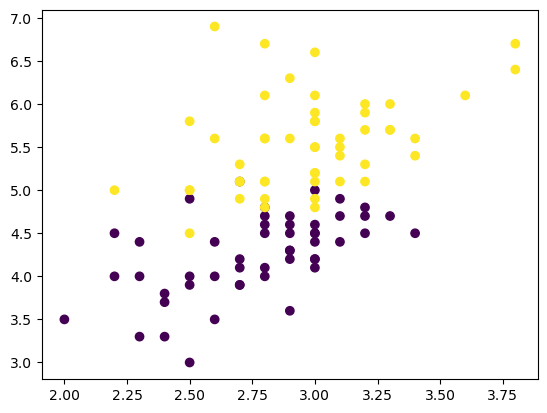

In [14]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap=None)

In [15]:
df.shape

(100, 3)

In [16]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
89,2.5,4.0,1
57,2.4,3.3,1
109,3.6,6.1,2
70,3.2,4.8,1
104,3.0,5.8,2
107,2.9,6.3,2
101,2.7,5.1,2
64,2.9,3.6,1
56,3.3,4.7,1
87,2.3,4.4,1


In [17]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [18]:
df_train

,sepal_width,petal_length,species
87,2.3,4.4,1
121,2.8,4.9,2
138,3.0,4.8,2
99,2.8,4.1,1
146,2.5,5.0,2
62,2.2,4.0,1
129,3.0,5.8,2
139,3.1,5.4,2
74,2.9,4.3,1
102,3.0,5.9,2


In [19]:
df_val

,sepal_width,petal_length,species
109,3.6,6.1,2
137,3.1,5.5,2
65,3.1,4.4,1
78,2.9,4.5,1
61,3.0,4.2,1


In [20]:
df_test

,sepal_width,petal_length,species
128,2.8,5.6,2
92,2.6,4.0,1
77,3.0,5.0,1
93,2.3,3.3,1
143,3.2,5.9,2


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
y_test

array([2, 2, 1, 1, 1])

# Case 1 - Bagging

In [23]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [24]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
87,2.3,4.4,1
129,3.0,5.8,2
102,3.0,5.9,2
138,3.0,4.8,2
102,3.0,5.9,2
121,2.8,4.9,2
87,2.3,4.4,1
129,3.0,5.8,2


In [25]:
X

,sepal_width,petal_length
87,2.3,4.4
129,3.0,5.8
102,3.0,5.9
138,3.0,4.8
102,3.0,5.9
121,2.8,4.9
87,2.3,4.4
129,3.0,5.8


In [26]:
y

87     1
129    2
102    2
138    2
102    2
121    2
87     1
129    2
Name: species, dtype: int32

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [33]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_train)
    y_pred1 = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred1))
    

In [34]:
dt_bag1 = DecisionTreeClassifier()

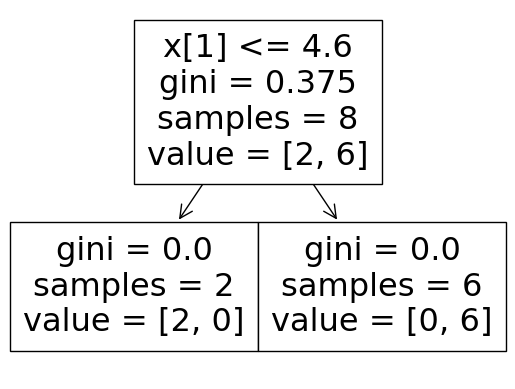

NameError: name 'plot_decision_regions' is not defined

In [36]:
evaluate(dt_bag1,X,y)

In [37]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
121,2.8,4.9,2
121,2.8,4.9,2
121,2.8,4.9,2
102,3.0,5.9,2
74,2.9,4.3,1
138,3.0,4.8,2
74,2.9,4.3,1
121,2.8,4.9,2


In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [ ]:
df_test

In [ ]:
import numpy as np

In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

# Pasting

In [ ]:
# Method 1
# Row sampling without replacement
df_train

In [ ]:
df_train.sample(8)

# Random Subspaces

In [ ]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [ ]:
df1

In [ ]:
df1.sample(2,replace=True,axis=1)

# Random Patches
- column sampling

In [ ]:
df1

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)